In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
training_data = []
Datadirectory = 'train_dataset/'
Classes = ['Closed_Eyes', 'Open_Eyes']
img_size=224

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category) 
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) 
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)     
           new_array = cv2.resize(backtorgb, (img_size,img_size))   
           training_data.append([new_array, class_num]) 
        except Exception as e:
          pass

  
create_training_data()

In [3]:
print(len(training_data))

4000


In [4]:
import random # for overfitting
random.shuffle(training_data)

In [5]:
train_images = [] 
train_labels = [] 

for features, label in training_data:
    train_images.append(features) 
    train_labels.append(label) 


train_images=np.array(train_images).reshape(-1, img_size, img_size,3)
train_labels=np.array(train_labels)

In [6]:
train_images.shape

(4000, 224, 224, 3)

In [7]:
train_images = train_images/255.0 #normalization

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = tf.keras.applications.mobilenet.MobileNet()

In [228]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [10]:
base_input = model.layers[0].input

In [11]:
base_output = model.layers[-4].output

In [12]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [13]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [14]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [15]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [16]:
modelhis = new_model.fit(train_images,train_labels, epochs = 50, validation_split = 0.1)

Epoch 1/50
113/113 [==============================] - 611s 5s/step - loss: 0.0219 - accuracy: 0.9925 - val_loss: 2.2399 - val_accuracy: 0.7925
Epoch 2/50
113/113 [==============================] - 570s 5s/step - loss: 8.1514e-04 - accuracy: 0.9997 - val_loss: 4.4036e-07 - val_accuracy: 1.0000
Epoch 3/50
113/113 [==============================] - 568s 5s/step - loss: 2.4033e-04 - accuracy: 1.0000 - val_loss: 2.6387e-10 - val_accuracy: 1.0000
Epoch 4/50
113/113 [==============================] - 546s 5s/step - loss: 3.2121e-04 - accuracy: 0.9997 - val_loss: 1.9898e-07 - val_accuracy: 1.0000
Epoch 5/50
113/113 [==============================] - 538s 5s/step - loss: 2.2247e-05 - accuracy: 1.0000 - val_loss: 6.2897e-09 - val_accuracy: 1.0000
Epoch 6/50
113/113 [==============================] - 538s 5s/step - loss: 1.4889e-04 - accuracy: 1.0000 - val_loss: 7.6064e-08 - val_accuracy: 1.0000
Epoch 7/50
113/113 [==============================] - 537s 5s/step - loss: 6.4922e-06 - accuracy: 1.00

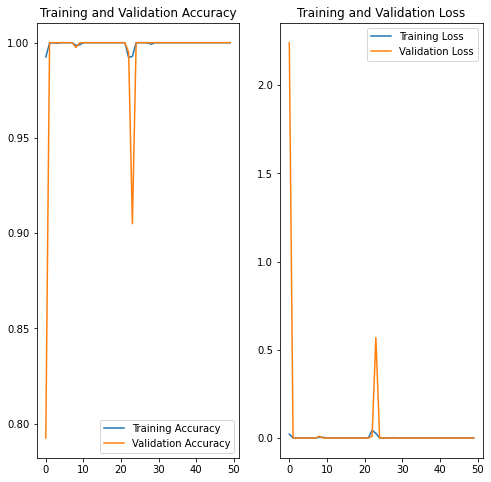

In [18]:
acc = modelhis.history['accuracy']
val_acc = modelhis.history['val_accuracy']

loss = modelhis.history['loss']
val_loss = modelhis.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [2]:
new_model.save('mytrainedmodel1.h5')

NameError: name 'new_model' is not defined

In [9]:
test_data = []
Datadirectory = 'test_dataset/'
Classes = ['closed_eye', 'open_eye']
img_size=224

def create_test_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)           
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           test_data.append([new_array, class_num])
        except Exception as e:
          pass

In [10]:
create_test_data()


In [11]:
print(len(test_data))

2000


In [13]:
import random 
random.shuffle(test_data)

In [14]:
test_images = []
test_labels = []

for features, label in test_data:
    test_images.append(features)
    test_labels.append(label)

test_images=np.array(test_images).reshape(-1, img_size, img_size,3)
test_labels=np.array(test_labels)

In [15]:
test_images = test_images/255.0

In [16]:
test_loss, test_acc = new_model.evaluate(test_images, test_labels, verbose=1)

63/63 [==============================] - 94s 1s/step - loss: 0.9299 - accuracy: 0.8595


In [2]:
new_model = tf.keras.models.load_model('mytrainedmodel1.h5')

In [21]:

random_eyes = 'random_eyes/'
ran = 'random'
path = os.path.join(random_eyes, ran)

img_size=224


def predict_random():
    for img in os.listdir(path):
        try :
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)           
            new_array = cv2.resize(backtorgb, (img_size,img_size))

            imginput =np.array(new_array).reshape(1, img_size, img_size,3)
            imginput = imginput/255.0
            prediction = new_model.predict(imginput)
          
            print (prediction)
            n = np.round(prediction)
            print (n)
            plt.figure()
            for i in range(1, 47):
                
                plt.imshow(new_array)
                if(n==0):
                    plt.title("CLOSED EYES  ".format(n))
                else:
                    plt.title("OPEN EYES  ".format(n))
            plt.show()  

                
        except Exception as e:
            print (e)

1/1 [==============================] - 0s 64ms/step
[[0.99877495]]
[[1.]]


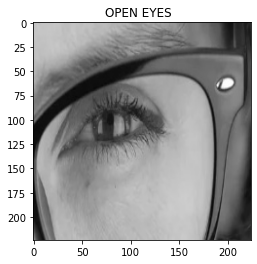

1/1 [==============================] - 0s 60ms/step
[[0.15687922]]
[[0.]]


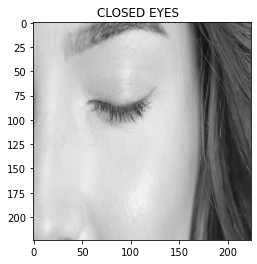

1/1 [==============================] - 0s 60ms/step
[[0.99707824]]
[[1.]]


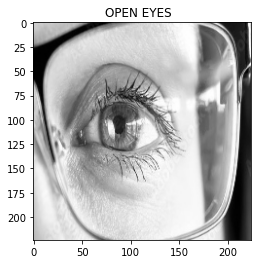

1/1 [==============================] - 0s 59ms/step
[[1.]]
[[1.]]


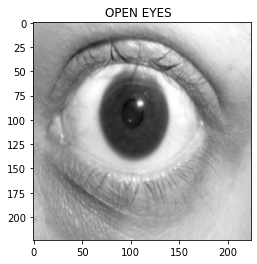

1/1 [==============================] - 0s 59ms/step
[[0.99989843]]
[[1.]]


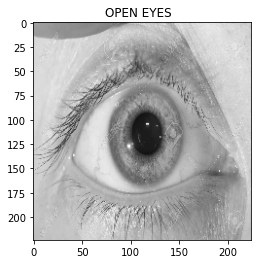

1/1 [==============================] - 0s 60ms/step
[[0.00096779]]
[[0.]]


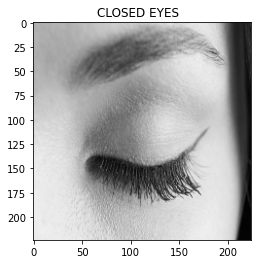

1/1 [==============================] - 0s 78ms/step
[[1.]]
[[1.]]


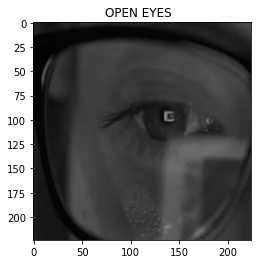

1/1 [==============================] - 0s 60ms/step
[[0.29618266]]
[[0.]]


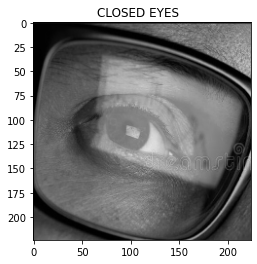

1/1 [==============================] - 0s 60ms/step
[[0.00012305]]
[[0.]]


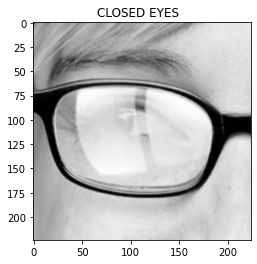

1/1 [==============================] - 0s 60ms/step
[[1.]]
[[1.]]


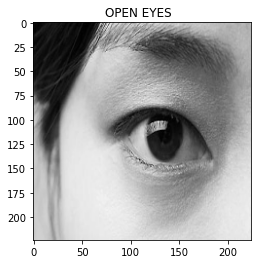

1/1 [==============================] - 0s 72ms/step
[[0.97464615]]
[[1.]]


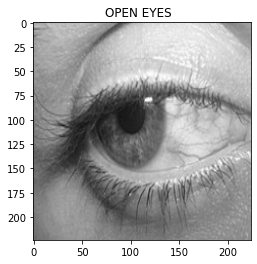

1/1 [==============================] - 0s 60ms/step
[[0.99911654]]
[[1.]]


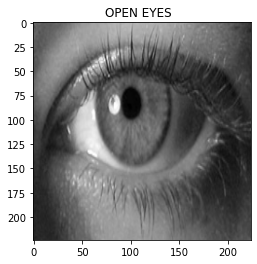

1/1 [==============================] - 0s 58ms/step
[[0.00055733]]
[[0.]]


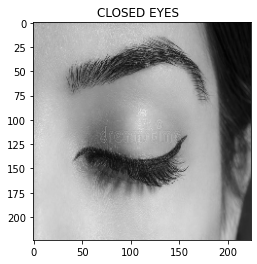

1/1 [==============================] - 0s 73ms/step
[[9.12656e-05]]
[[0.]]


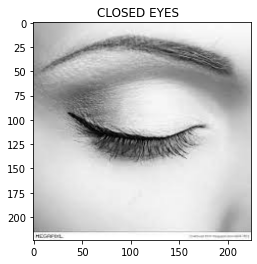

1/1 [==============================] - 0s 69ms/step
[[0.8842769]]
[[1.]]


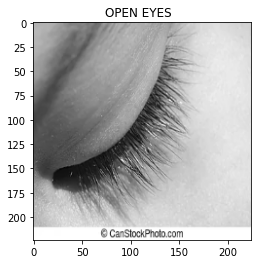

1/1 [==============================] - 0s 81ms/step
[[0.00026242]]
[[0.]]


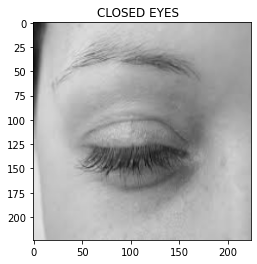

1/1 [==============================] - 0s 59ms/step
[[0.02804707]]
[[0.]]


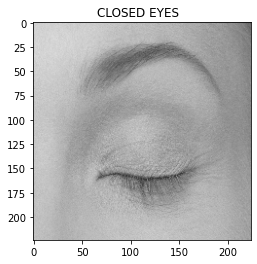

1/1 [==============================] - 0s 59ms/step
[[0.0003057]]
[[0.]]


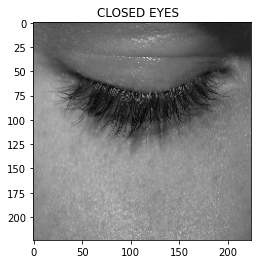

1/1 [==============================] - 0s 62ms/step
[[0.9999981]]
[[1.]]


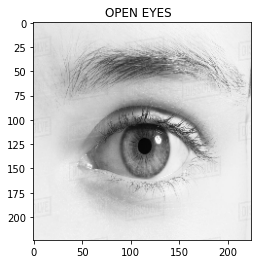

1/1 [==============================] - 0s 77ms/step
[[0.7591954]]
[[1.]]


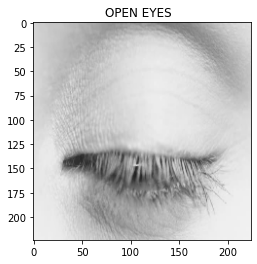

1/1 [==============================] - 0s 59ms/step
[[0.00023556]]
[[0.]]


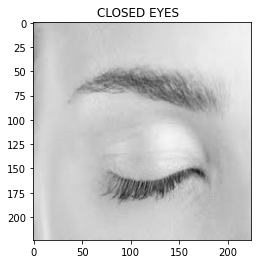

1/1 [==============================] - 0s 59ms/step
[[0.9999947]]
[[1.]]


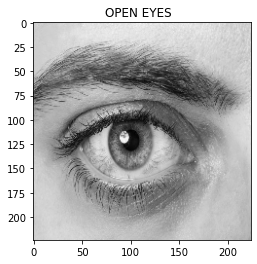

1/1 [==============================] - 0s 60ms/step
[[2.4353645e-05]]
[[0.]]


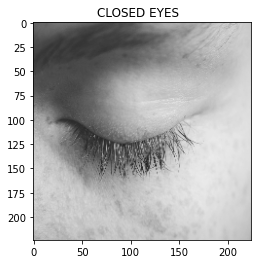

1/1 [==============================] - 0s 58ms/step
[[1.]]
[[1.]]


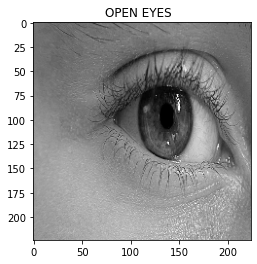

1/1 [==============================] - 0s 68ms/step
[[3.2986152e-06]]
[[0.]]


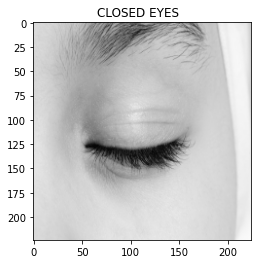

1/1 [==============================] - 0s 59ms/step
[[8.526076e-05]]
[[0.]]


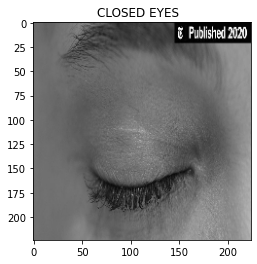

1/1 [==============================] - 0s 60ms/step
[[0.00012929]]
[[0.]]


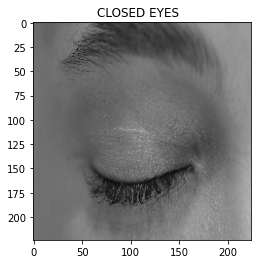

1/1 [==============================] - 0s 65ms/step
[[1.]]
[[1.]]


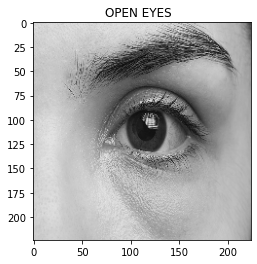

1/1 [==============================] - 0s 62ms/step
[[1.3587477e-05]]
[[0.]]


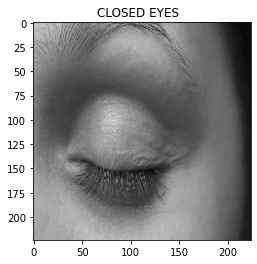

1/1 [==============================] - 0s 59ms/step
[[8.5623157e-07]]
[[0.]]


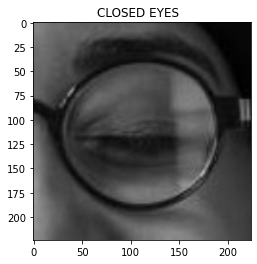

1/1 [==============================] - 0s 58ms/step
[[2.6429601e-05]]
[[0.]]


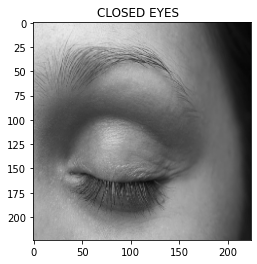

1/1 [==============================] - 0s 59ms/step
[[1.]]
[[1.]]


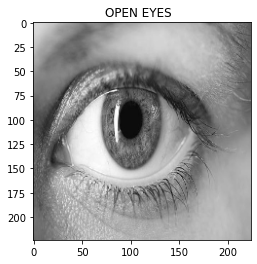

1/1 [==============================] - 0s 58ms/step
[[1.]]
[[1.]]


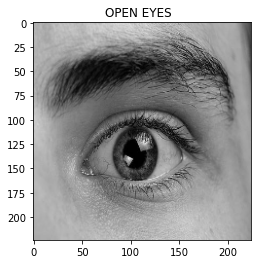

1/1 [==============================] - 0s 59ms/step
[[0.9999997]]
[[1.]]


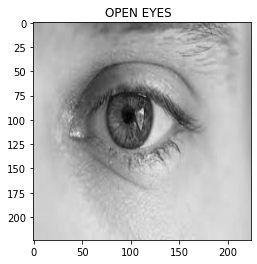

1/1 [==============================] - 0s 57ms/step
[[1.]]
[[1.]]


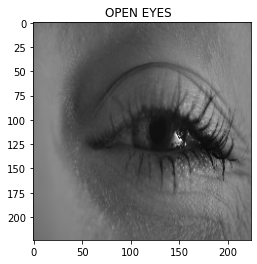

1/1 [==============================] - 0s 59ms/step
[[0.9821091]]
[[1.]]


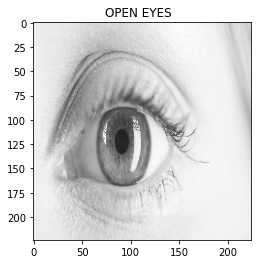

1/1 [==============================] - 0s 60ms/step
[[0.9999985]]
[[1.]]


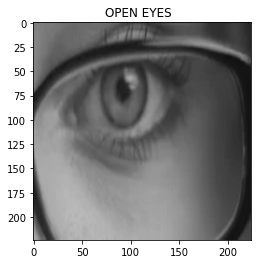

1/1 [==============================] - 0s 60ms/step
[[1.]]
[[1.]]


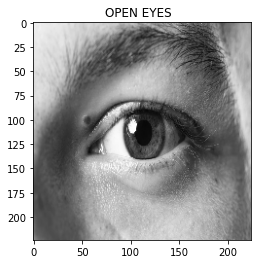

1/1 [==============================] - 0s 77ms/step
[[1.]]
[[1.]]


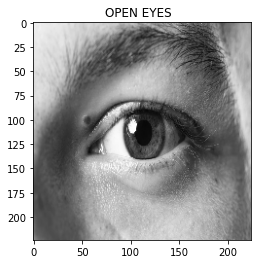

1/1 [==============================] - 0s 78ms/step
[[0.9999946]]
[[1.]]


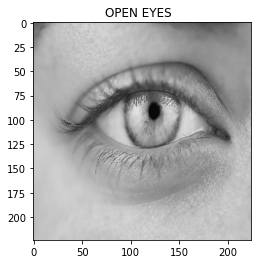

1/1 [==============================] - 0s 69ms/step
[[0.9959717]]
[[1.]]


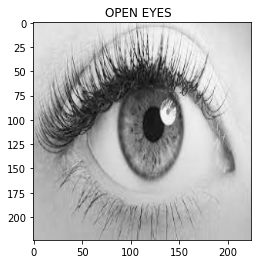

1/1 [==============================] - 0s 59ms/step
[[1.]]
[[1.]]


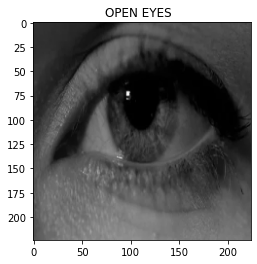

1/1 [==============================] - 0s 66ms/step
[[0.99990284]]
[[1.]]


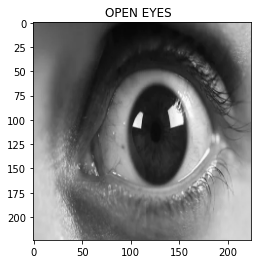

1/1 [==============================] - 0s 63ms/step
[[0.9999865]]
[[1.]]


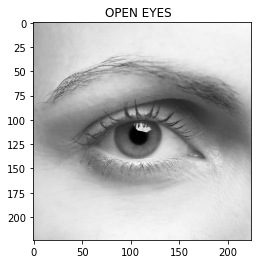

1/1 [==============================] - 0s 62ms/step
[[0.99999636]]
[[1.]]


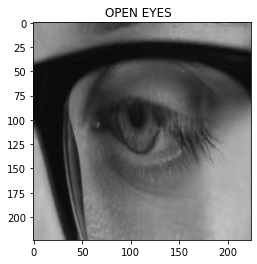

1/1 [==============================] - 0s 60ms/step
[[0.9997432]]
[[1.]]


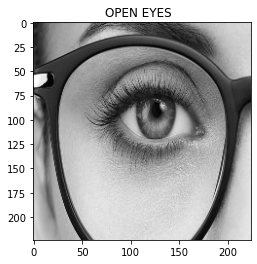

1/1 [==============================] - 0s 134ms/step
[[0.9999997]]
[[1.]]


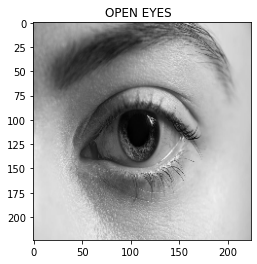

1/1 [==============================] - 0s 62ms/step
[[0.98581445]]
[[1.]]


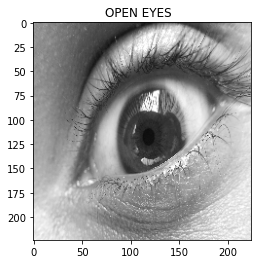

1/1 [==============================] - 0s 61ms/step
[[1.]]
[[1.]]


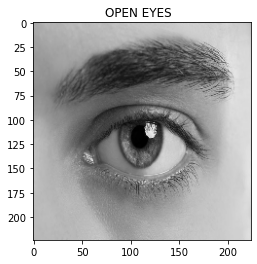

1/1 [==============================] - 0s 60ms/step
[[0.9635808]]
[[1.]]


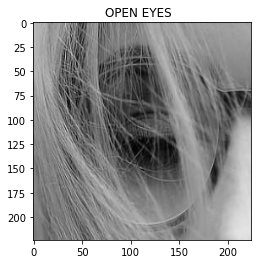

In [25]:
predict_random()
